In [4]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

from scipy.spatial import KDTree

from rbffd import *

# Mesh 

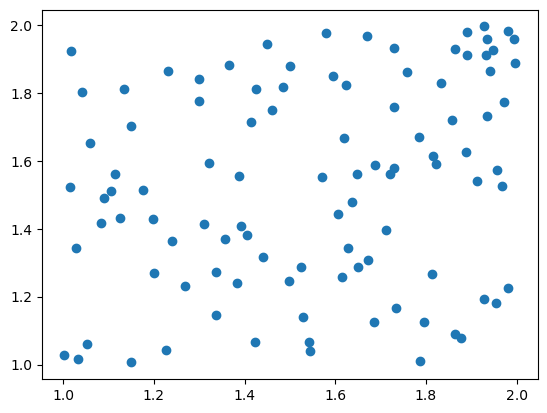

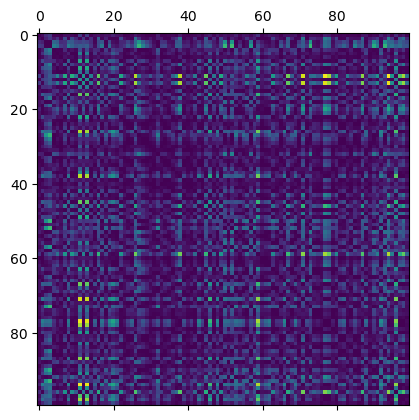

In [32]:
N = 100

rng = np.random.default_rng(0)

# Set up the nodes and epsilon
D = np.hstack((rng.uniform(1, 2.0, (N, 1)), rng.uniform(1, 2.0, (N, 1))))

plt.scatter(D[:, 0], D[:, 1])

plt.show()

epsilon = 3.0

rbf = phs_rbf

A = setup_rbf_matrix(D, epsilon, rbf=rbf)

plt.matshow(A)

In [33]:
tree = KDTree(D)

# Set up the differential operator (Laplacian in this case)
L = laplacian_operator(D, epsilon, rbf=rbf, tree=tree, stencil_size=5, pdeg=1)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = la.eig(L)

index = np.argsort(eigenvalues)

eigenvalues = eigenvalues[index]
eigenvectors = eigenvectors[:,index]

if np.allclose(np.real(eigenvalues), eigenvalues):
    print("Eigenvalues are real")

IndexError: index 100 is out of bounds for axis 1 with size 100

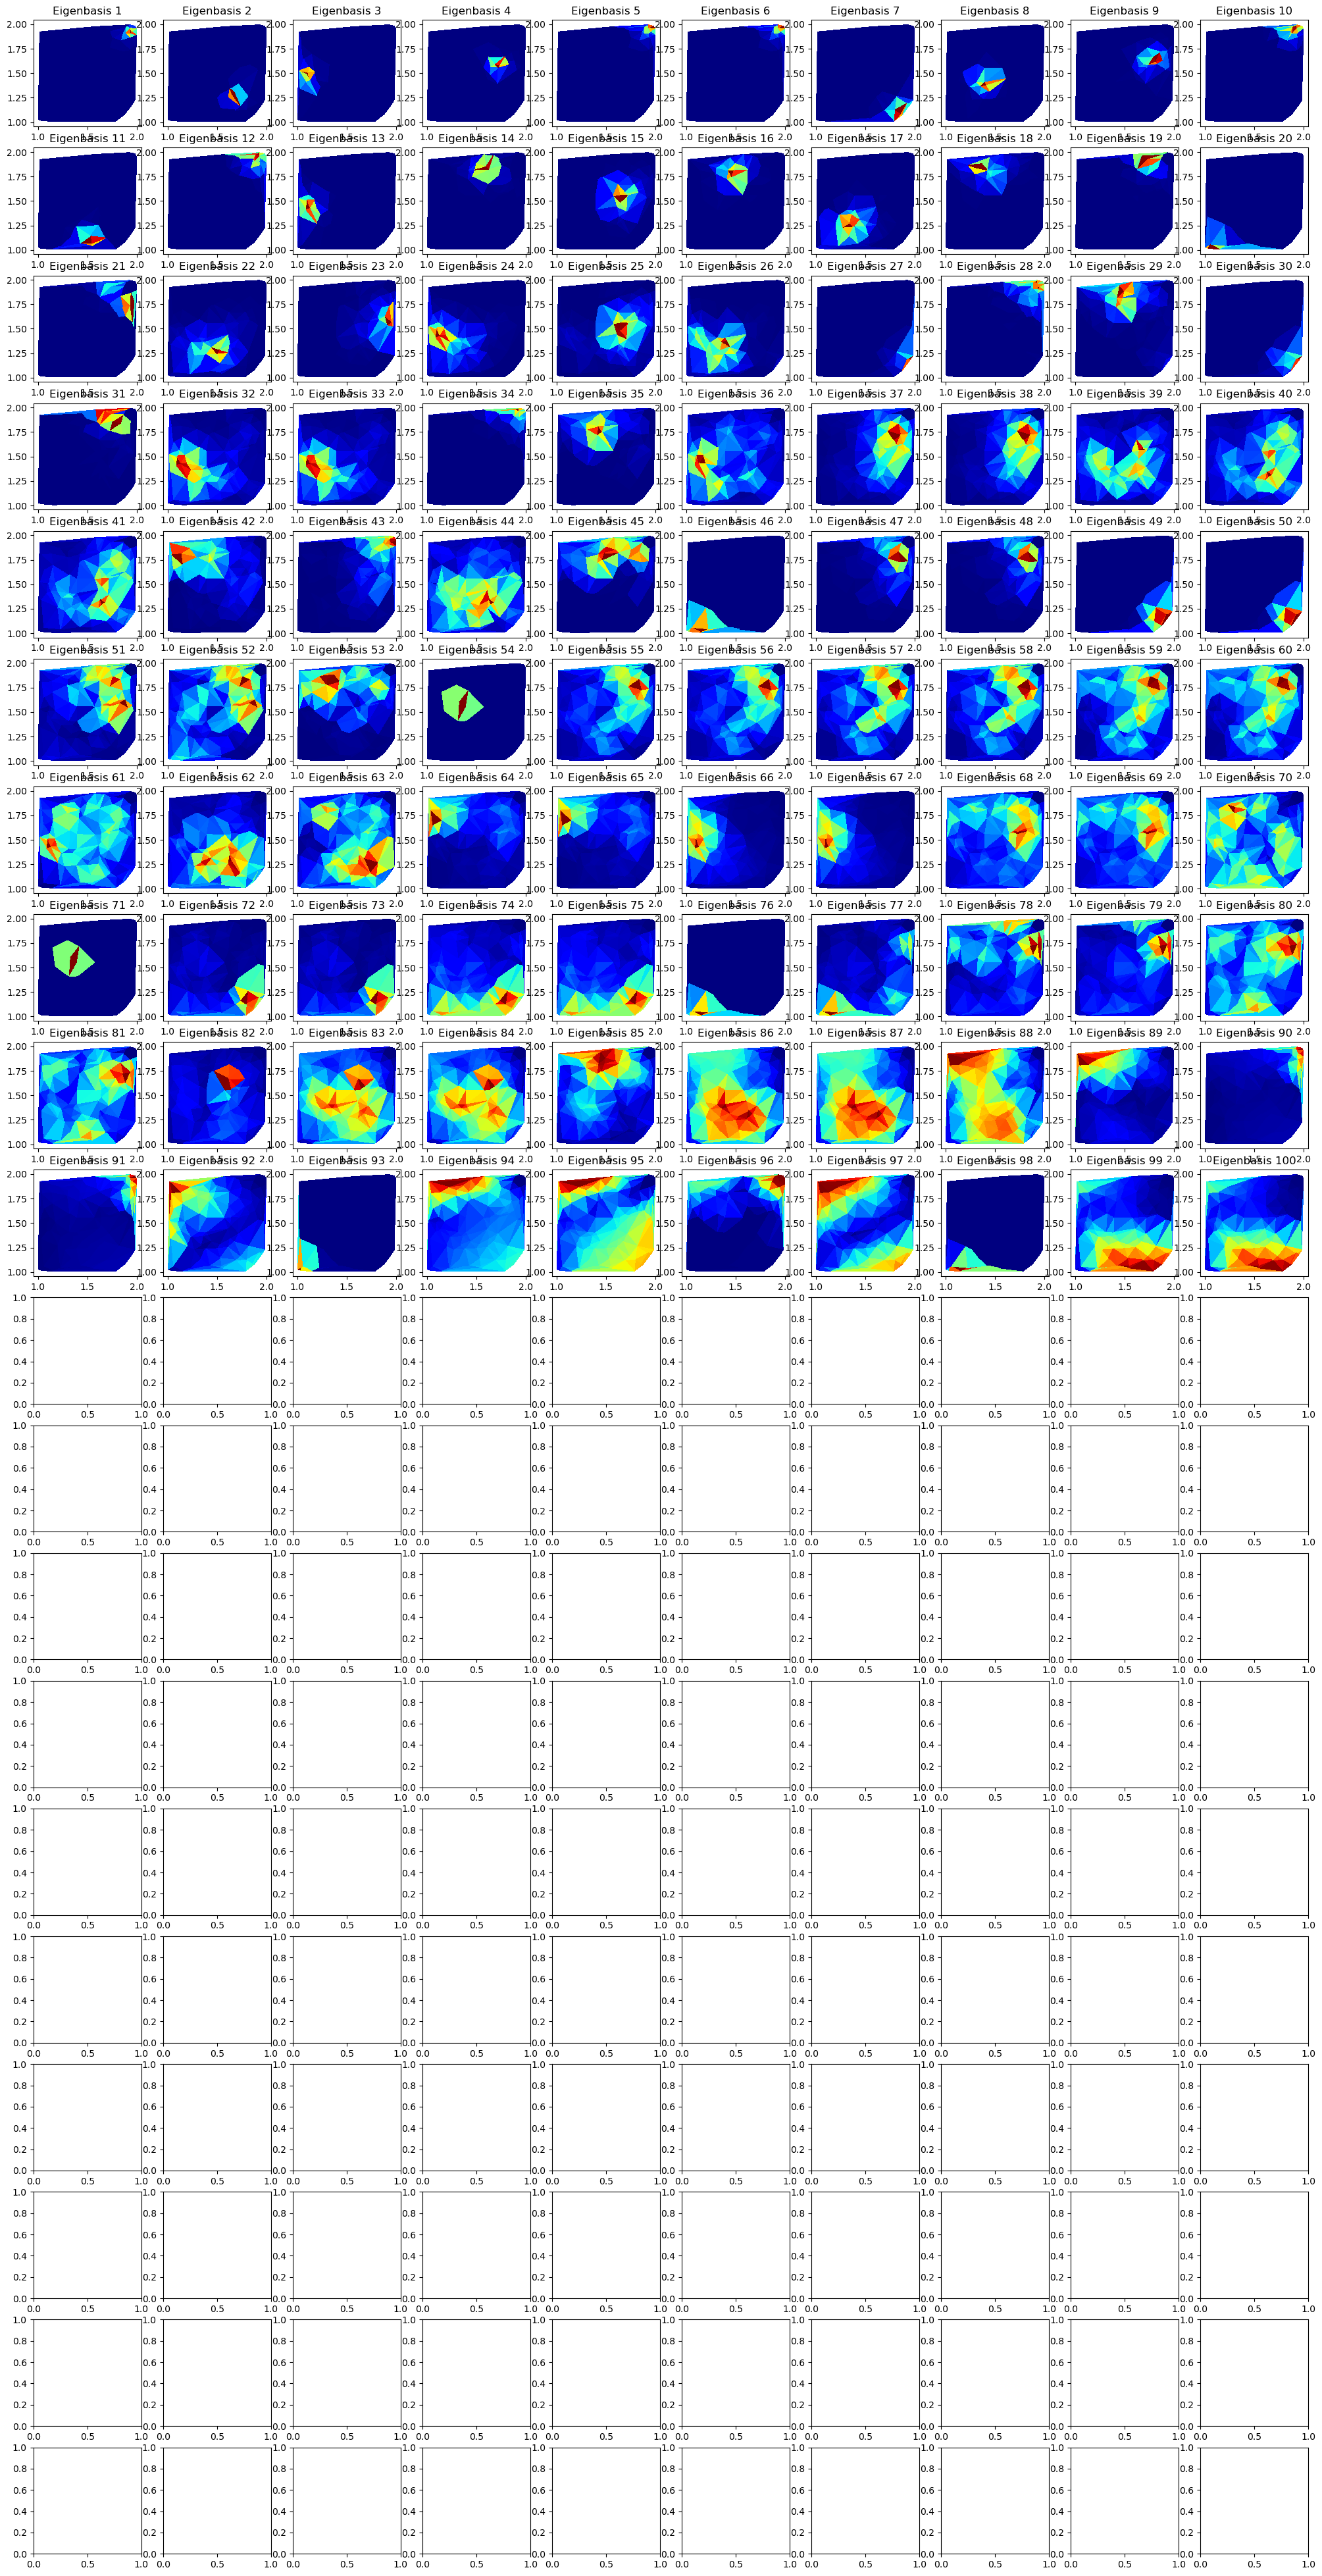

In [34]:
fig, axs = plt.subplots(20, 10, figsize=(25, 50))

for i, ax in enumerate(axs.flatten()):

    if i > N**2-1:
        ax.axis("off")
        continue

    # Plot the function values as colors in 2D
    ax.tripcolor(D[:,0], D[:,1], np.real(np.sqrt(np.conj(eigenvectors[:,i]) * eigenvectors[:,i])), cmap='jet')
    ax.set_title(f"Eigenbasis {i+1}")

    if i > N:
        break

plt.tight_layout()
plt.show()

# Grid

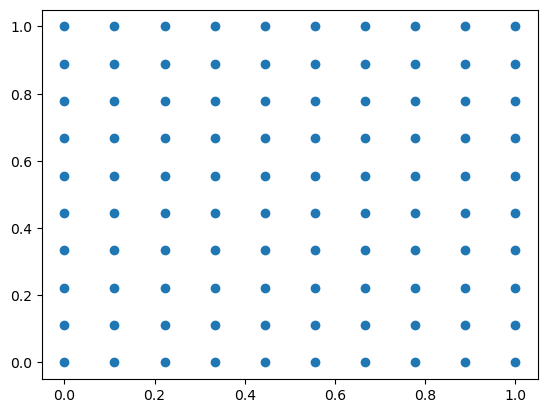

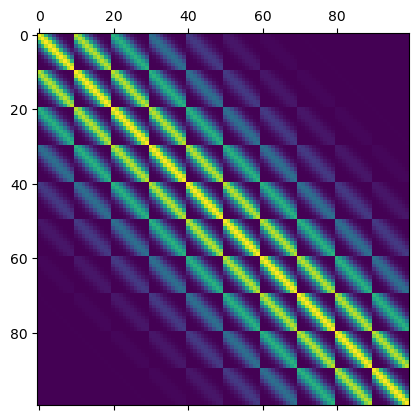

In [9]:
N = 10

# Set up the nodes and epsilon
X_grid = np.linspace(0, 1, N)
Y_grid = np.linspace(0, 1, N)

X, Y = np.meshgrid(X_grid, Y_grid)

D = np.hstack((X.flatten()[:,None], Y.flatten()[:,None]))


plt.scatter(D[:, 0], D[:, 1])

plt.show()

epsilon = 3.0

rbf = gaussian_rbf

A = setup_rbf_matrix(D, epsilon, rbf=rbf)

plt.matshow(A)

In [10]:
tree = KDTree(D)

# Set up the differential operator (Laplacian in this case)
L = laplacian_operator(D, epsilon, rbf=rbf, tree=tree, stencil_size=9, pdeg=1)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = la.eig(L)

index = np.argsort(eigenvalues)

eigenvalues = eigenvalues[index]
eigenvectors = np.real(np.sqrt(np.conj(eigenvectors[:,index]) * eigenvectors[:,index]))

if np.allclose(np.real(eigenvalues), eigenvalues):
    print("Eigenvalues are real")

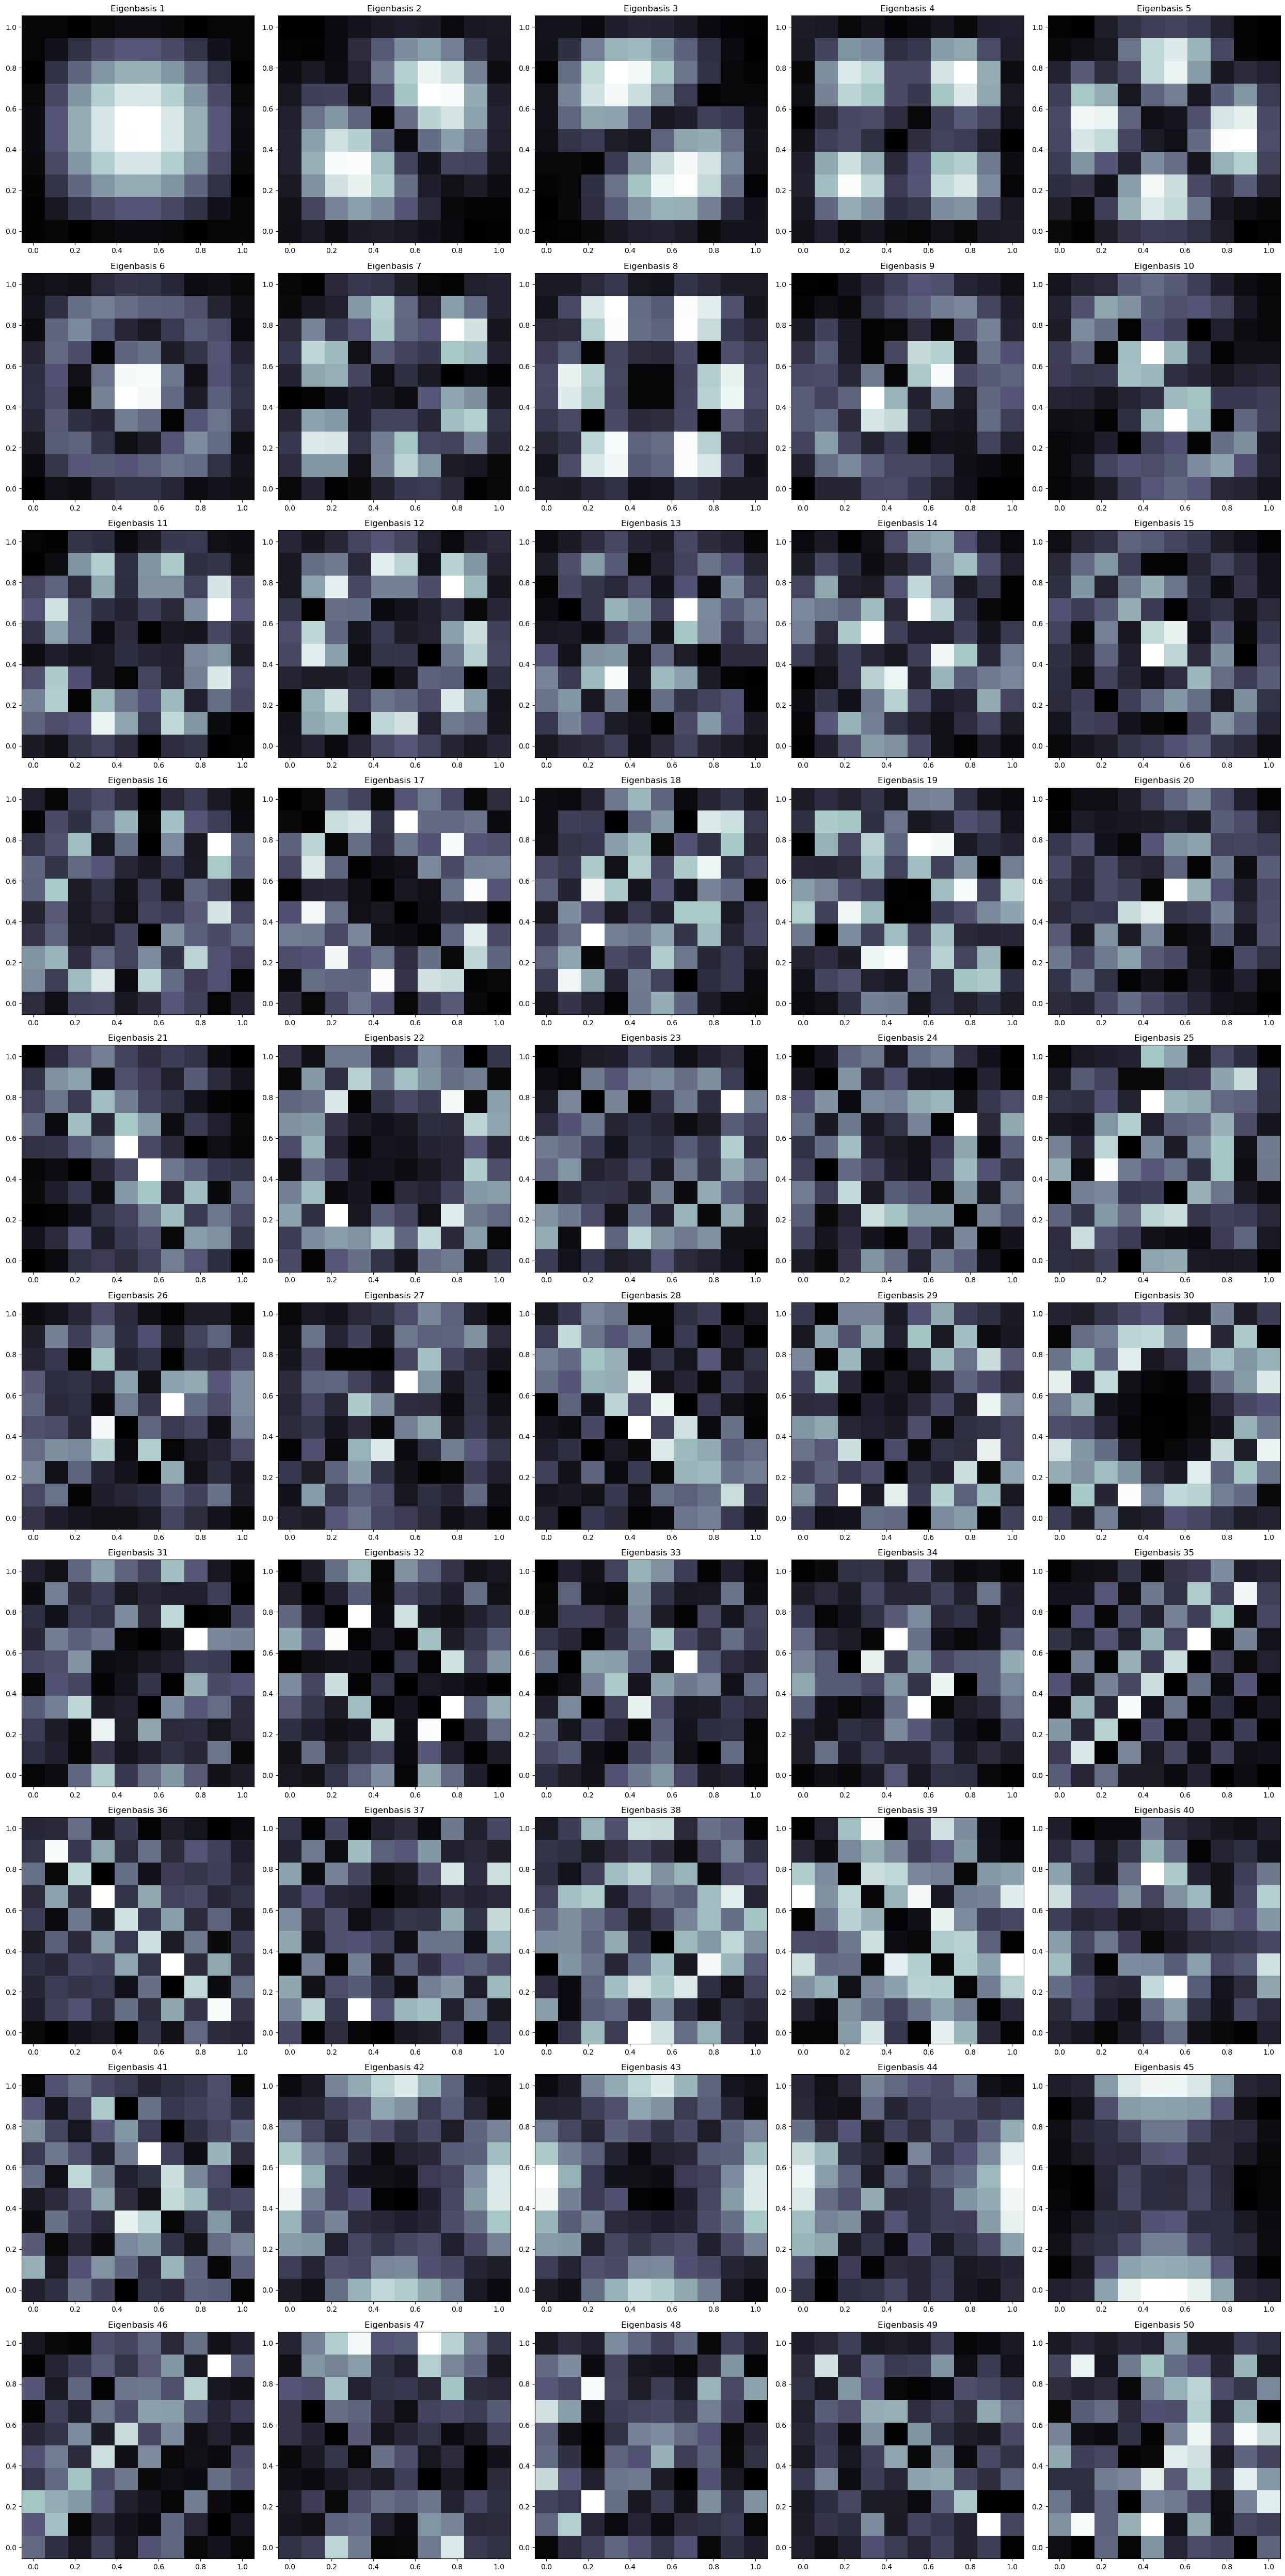

In [11]:
fig, axs = plt.subplots(10, 5, figsize=(25, 50))

for i, ax in enumerate(axs.flatten()):

    if i > N**2-1:
        ax.axis("off")
        continue

    # Plot the function values as colors in 2D
    ax.pcolormesh(X, Y, eigenvectors[:,i].reshape(N,N), cmap='bone')
    ax.set_title(f"Eigenbasis {i+1}")

    if i > 50:
        break

plt.tight_layout()
plt.show()

# Noisy Grid

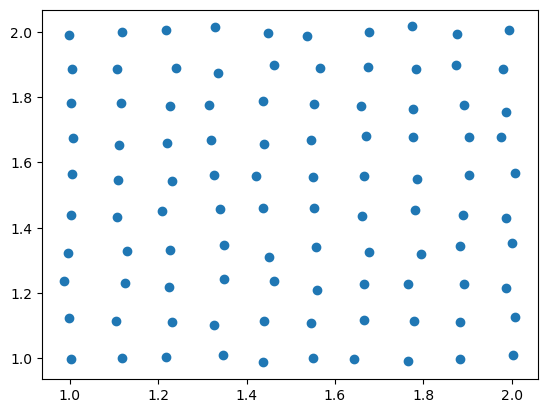

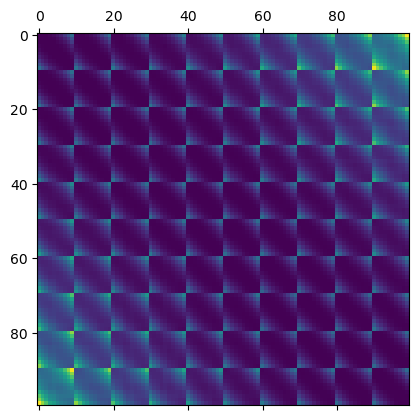

In [21]:
N = 10

rng = np.random.default_rng(0)

# Set up the nodes and epsilon
X_grid = np.linspace(1, 2, N)
Y_grid = np.linspace(1, 2, N)

X, Y = np.meshgrid(X_grid, Y_grid)

D = np.hstack((X.flatten()[:,None], Y.flatten()[:,None])) + rng.normal(0,0.01, (N**2, 2))


plt.scatter(D[:, 0], D[:, 1])

plt.show()

epsilon = 3

rbf = phs_rbf

A = setup_rbf_matrix(D, epsilon, rbf=rbf)

plt.matshow(A)

In [22]:
tree = KDTree(D)

# Set up the differential operator (Laplacian in this case)
L = laplacian_operator(D, epsilon, rbf=rbf, tree=tree, stencil_size=9, pdeg=1)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = la.eig(L)

print('Condition Number:', np.linalg.cond(L))

#print(L)

#index = np.argsort(eigenvalues)

#eigenvalues = eigenvalues[index]
#eigenvectors = eigenvectors[:,index]

if np.allclose(np.real(eigenvalues), eigenvalues):
    print("Eigenvalues are real")

Condition Number: 8722843448.492918


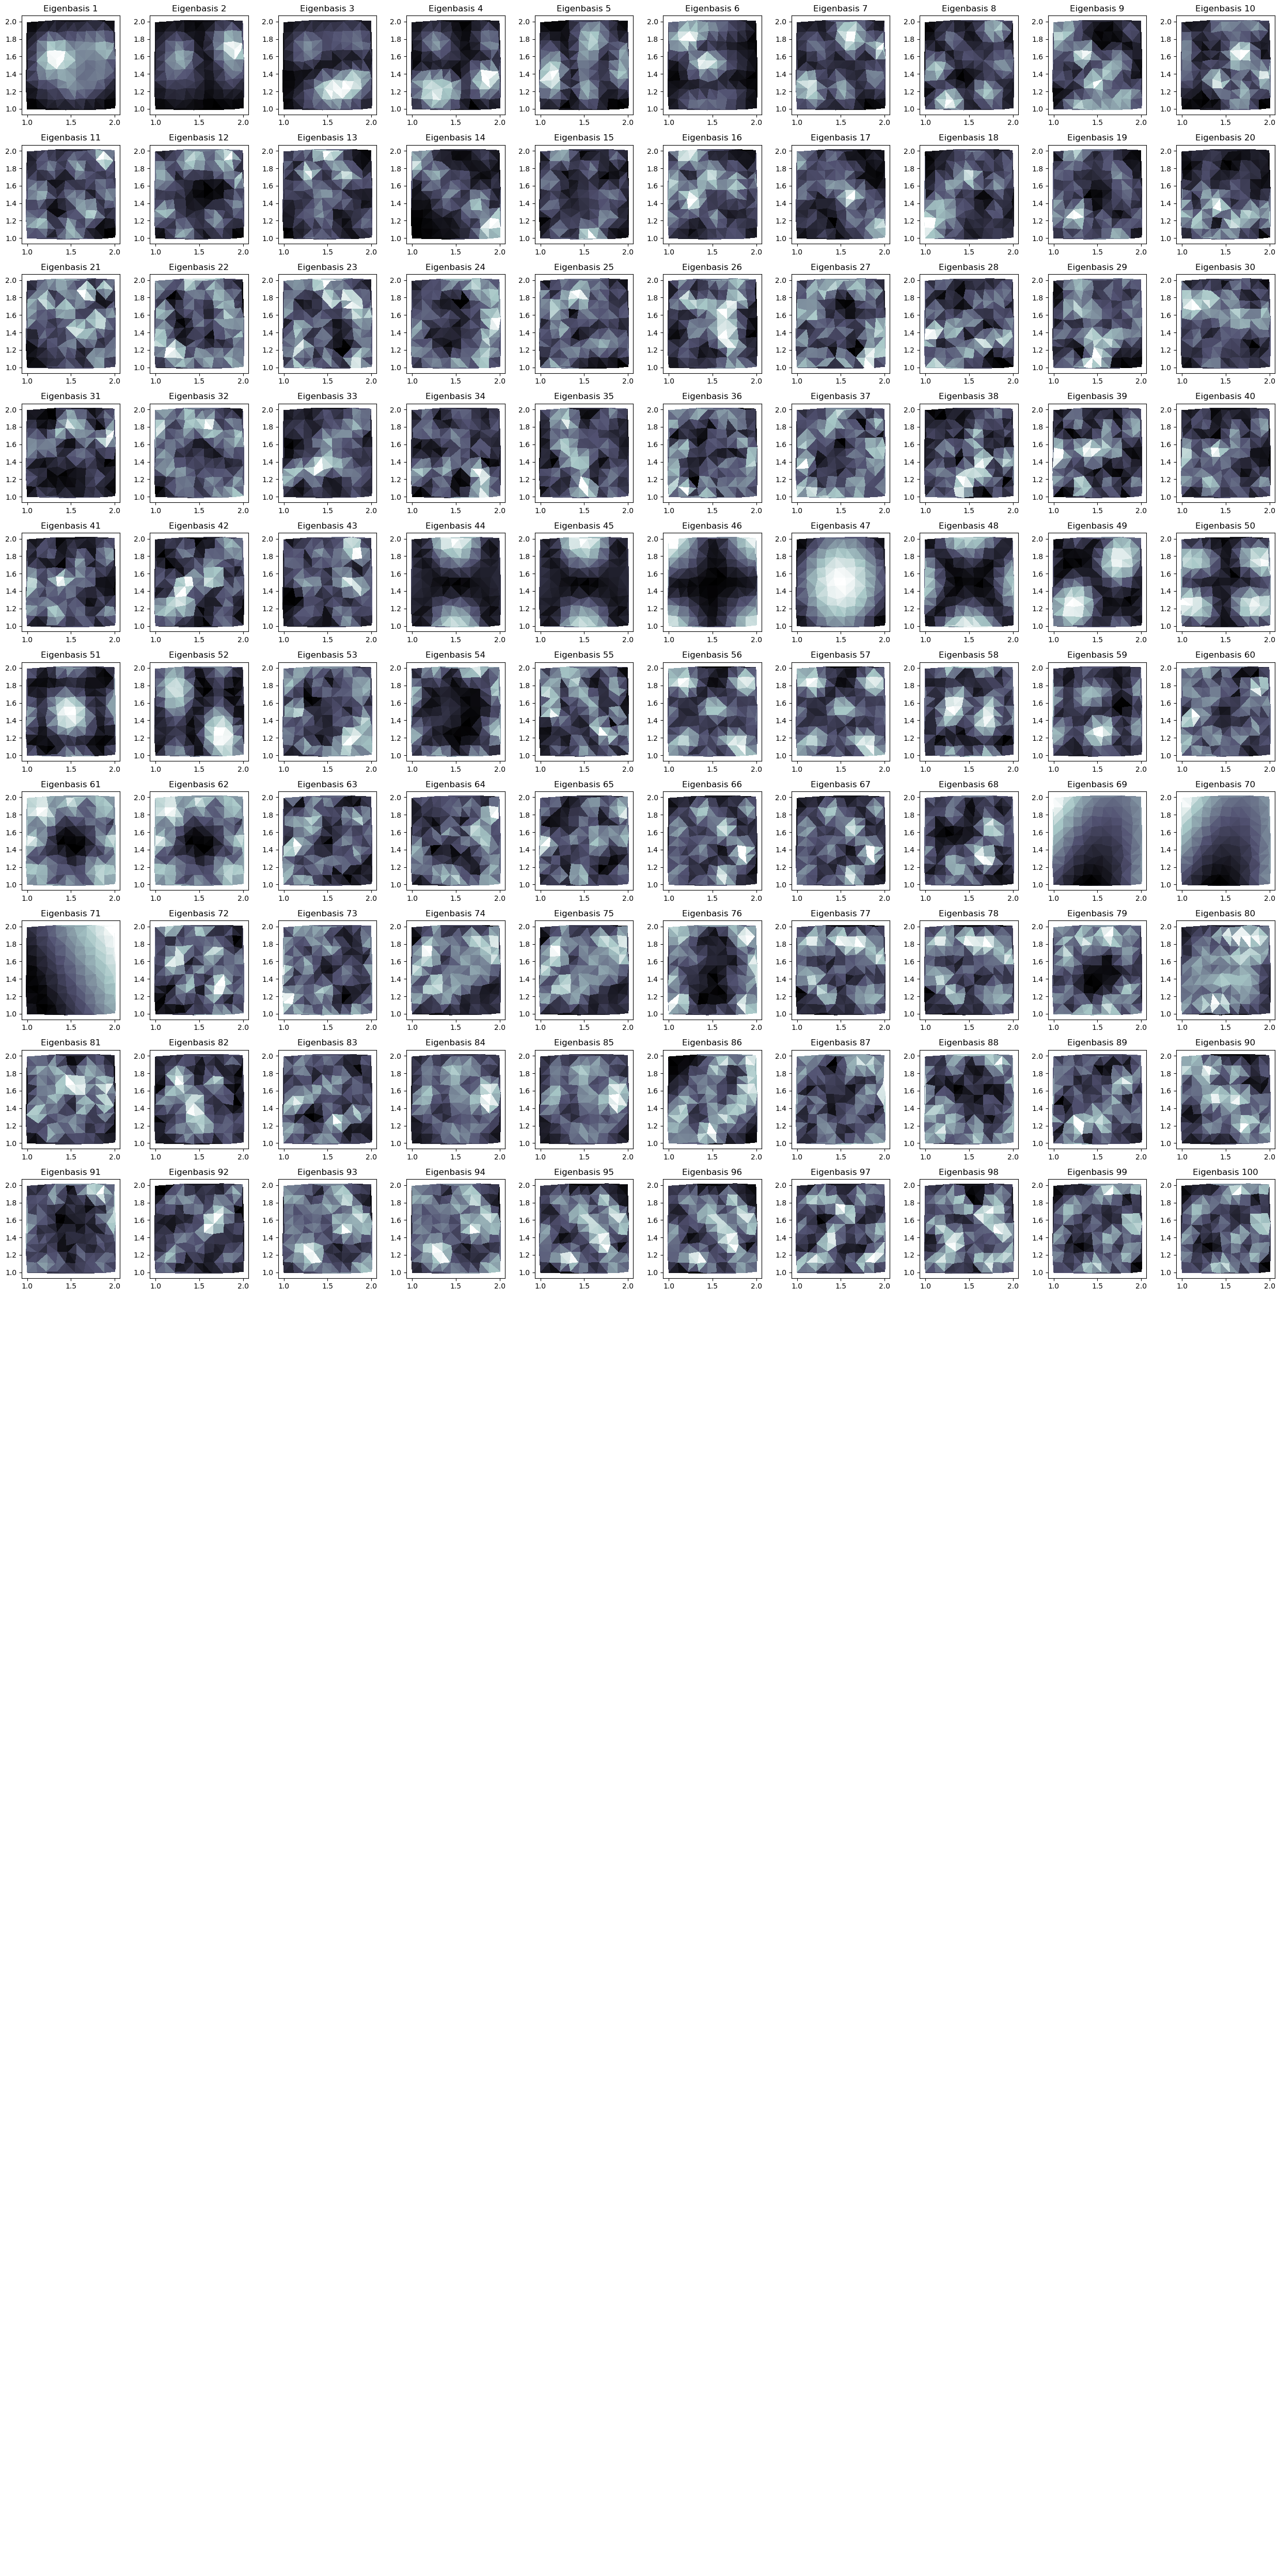

In [23]:
fig, axs = plt.subplots(20, 10, figsize=(25, 50))

for i, ax in enumerate(axs.flatten()):

    if i > N**2-1:
        ax.axis("off")
        continue

    # Plot the function values as colors in 2D
    ax.tripcolor(D[:,0], D[:,1], np.real(np.sqrt(np.conj(eigenvectors[:,i]) * eigenvectors[:,i])), cmap='bone')
    ax.set_title(f"Eigenbasis {i+1}")

    if i > 200:
        break

plt.tight_layout()
plt.show()